In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# this argument is used in the IPython/Jupyter Notebooks.
# It tells is to incorporate the plot in the notebook instead of poping a new
#  window with the plot (which is the default)

In [12]:
# Ensure reproducability
seed = 42
np.random.seed(seed)

In [13]:
x = np.linspace(0, 100, 100)  # training examples
y = 2 * x + 10 * np.random.normal(size=100)  # labels

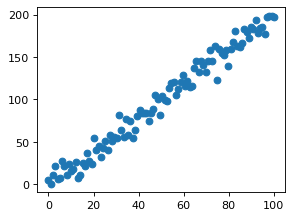

In [14]:
plt.figure(figsize=(4, 3), dpi=80)
plt.scatter(x,y)

In [15]:
class UniLinearRegression:

    def __init__(self, epochs=100, learning_rate=0.0001, random_seed=42):
        """ Univariate Linear Regression class

        Parameters:
        ----------
        epoch : int
            The number of epochs.
        learning_rate : float
            The learning rate of the algorithm.
        random_seed : int
            A seed for the initialization of weights.

        Returns:
        ----------
        None
        """

        self.epochs = epochs
        self.lr = learning_rate
        self.a, self.b = self.initialize(random_seed)
        self.a_history = []
        self.b_history = []

    def initialize(self, seed):
        """
        Method that initializes the weights to random values.
        """
        np.random.seed(seed)
        a = np.random.random()
        b = np.random.random()
        return a, b

    def predict(self, x):
        """
        Method that makes predictions for a number of points.
        """
        return self.a * x + self.b

    def cost(self, x, y):
        """
        Method that calculates the cost of the prediction (MSE).
        """
        y_hat = self.predict(x)
        return sum(((y - y_hat)**2)) / len(y)

    def update(self, x, y):
        """
        Method that runs one iteration of gradient descent and updates the
        class' weights
        """
        y_hat = self.predict(x)
        da = - (2 / len(x)) * sum(x * (y - y_hat))
        db = - (2 / len(x)) * sum(y - y_hat)
        self.a -= (self.lr * da)
        self.b -= (self.lr * db)

        return None

    def fit(self, x, y):
        """
        Method that handles the whole training procedure.
        """
        for ep in range(self.epochs):
            self.a_history.append(self.a)
            self.b_history.append(self.b)
            self.update(x, y)

        return None

In [16]:
model = UniLinearRegression(epochs=10)
model.fit(x, y)

Text(0.5, 1.0, 'Linear Regression (first 10 epochs)')

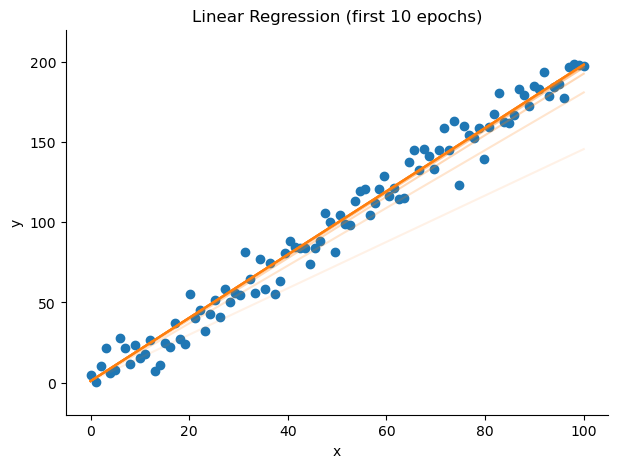

In [17]:
#                                                PLOTTING:
#                              --------------------------------------------

# Create figure
fig = plt.figure(figsize=(7, 5))
ax = plt.subplot(111)

# Scatter data points
ax.scatter(x, y, c='#1f77b4', label='data points')

# Draw the predictions for the first four epochs
predictions = [model.a_history[i] * x + model.b_history[i] for i in range(len(model.a_history))]

for i in range(len(model.a_history)):
    ax.plot(x, predictions[i], c='#ff7f0e', alpha=i/len(predictions))

# Aesthetic parameters
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.set_ylim([-20, 220])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

ax.set_title('Linear Regression (first {} epochs)'.format(model.epochs))